## Final Logistic Baseline Models (most updated dataset)

Ran 4 different models, 2 with all 21 features and 2 with 13 features (8 removed)

Important statistics:  

- Model with best accuracy:  
  - Binary Logistc Regression Model with 21 features, L1 reg, solver = 'liblinear'  
  - Accuracy = 90.989%

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

df = pd.read_csv('C:/Users/acts5/Downloads/ECS 171/diabetes-risk-predictor/3_to_classes_.csv')

print(df.head())
print(df.to_numpy())
print(df.shape)


   Diabetes_binary  HighBP  HighChol  CholCheck  NEW_BMI_class  Smoker  \
0                0       1         0          1              0       0   
1                0       1         1          1              0       1   
2                0       0         0          1              0       0   
3                0       1         1          1              0       1   
4                0       0         0          1              0       1   

   Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0       0                     0             1       0  ...              1   
1       1                     0             0       1  ...              1   
2       0                     0             1       1  ...              1   
3       0                     0             1       1  ...              1   
4       0                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MetHlth_Class  PhyHlth_Class  DiffWalk  Sex  Age  \
0            0 

#### Standardize All Features
#### 21 Feature Dataset & 13 Feature Dataset (Remove 8)

In [21]:

#---------------- 21 Features Dataset -------------------

#numpy arrays
y_21 = df.iloc[ :, 0].values #target variable column... jus the first column
X_21 = df.iloc[ :, 1:].values #predictor variable columns... everything from the second to last column

# Train/test split
from sklearn.model_selection import train_test_split
X_train_21, X_test_21, y_train_21, y_test_21 = train_test_split(X_21, y_21, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_21 = scaler.fit_transform(X_train_21)
X_test_21 = scaler.fit_transform(X_test_21)

print(X_train_21.shape)
print(X_test_21.shape)

# ---------------- 13 Features Dataset ------------------------

#Remove 8 unecessary features
df_13 = df.drop(columns=['Veggies','AnyHealthcare', 
                         'CholCheck', 'HvyAlcoholConsump', 
                         'Fruits', 'NoDocbcCost', 
                         'PhysActivity','Sex'])

#numpy arrays
y_8 = df_13.iloc[ :, 0].values #target variable column... jus the first column
X_8 = df_13.iloc[ :, 1:].values #predictor variable columns... everything from the second to last column

# Train/test split
from sklearn.model_selection import train_test_split
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_8 = scaler.fit_transform(X_train_8)
X_test_8 = scaler.fit_transform(X_test_8)

print(X_train_8.shape)
print(X_test_8.shape)


(56553, 21)
(14139, 21)
(56553, 13)
(14139, 13)


### 21 Feature Models (a & b)

#### a) 21 features, L2 reg, solver = 'lbfgs'

Binary Logistic Regression (21 features) accuracy: 0.90996534408374
Number Correct: 12866 out of 14139


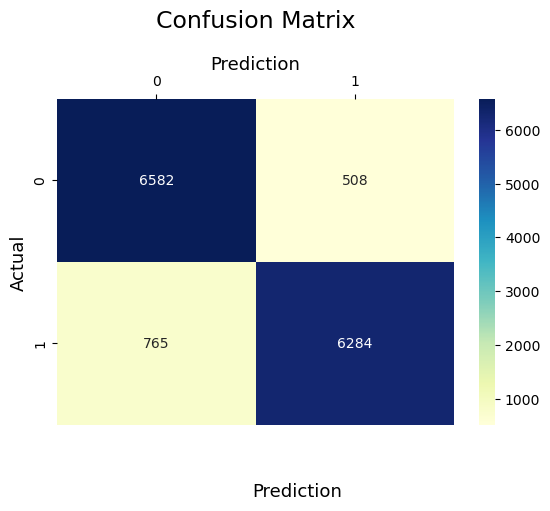

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7090
           1       0.93      0.89      0.91      7049

    accuracy                           0.91     14139
   macro avg       0.91      0.91      0.91     14139
weighted avg       0.91      0.91      0.91     14139



In [13]:
BLR_a = LogisticRegression(
                    penalty='l2',
                    solver='lbfgs',
                    random_state=42).fit(X_train_21, y_train_21)

y_pred_a = BLR_a.predict(X_test_21)

# accuracy
acc = accuracy_score(y_test_21, y_pred_a)
print(f"Binary Logistic Regression (21 features) accuracy: {acc}")

# Number correct = accuracy * total samples
num_total = len(y_test_21)
num_correct = int(acc * num_total)

print(f"Number Correct: {num_correct} out of {num_total}")

# Confusion Matrix
cm = confusion_matrix(y_test_21, y_pred_a)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            cmap = 'YlGnBu',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print(classification_report(y_test_21, y_pred_a))

#### **b)** 21 features, L1 reg, solver = 'liblinear'  

Binary Logistic Regression (21 features) accuracy: 0.9098946177240257
Number Correct: 12865 out of 14139


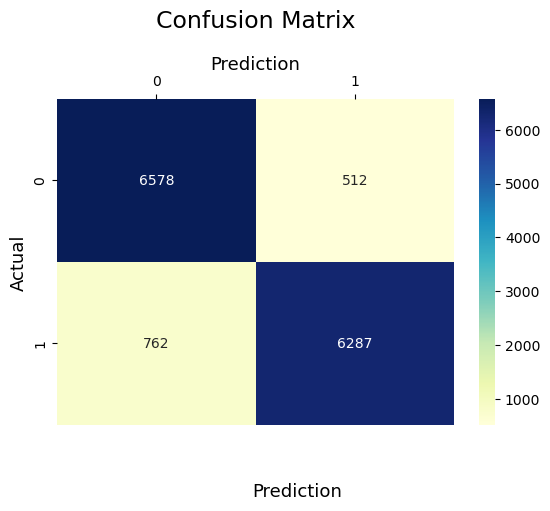

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7090
           1       0.92      0.89      0.91      7049

    accuracy                           0.91     14139
   macro avg       0.91      0.91      0.91     14139
weighted avg       0.91      0.91      0.91     14139



In [22]:
BLR_b = LogisticRegression(
                    penalty='l1',
                    solver='liblinear',
                    random_state=42).fit(X_train_21, y_train_21)

y_pred_b = BLR_b.predict(X_test_21)


# accuracy
acc = accuracy_score(y_test_21, y_pred_b)
print(f"Binary Logistic Regression (21 features) accuracy: {acc}")

# Number correct = accuracy * total samples
num_total = len(y_test_21)
num_correct = int(acc * num_total)

print(f"Number Correct: {num_correct} out of {num_total}")

# Confusion Matrix
cm = confusion_matrix(y_test_21, y_pred_b)
sns.heatmap(cm,
            annot=True,
            fmt='g', 
            cmap = 'YlGnBu',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print(classification_report(y_test_21, y_pred_b))
            

### 13 Feature Models (c & d)

#### c) 13 features, L2 reg, solver = 'lbfgs'

Binary Logistic Regression (13 features) accuracy: 0.9093288068463116
Number Correct: 12857 out of 14139


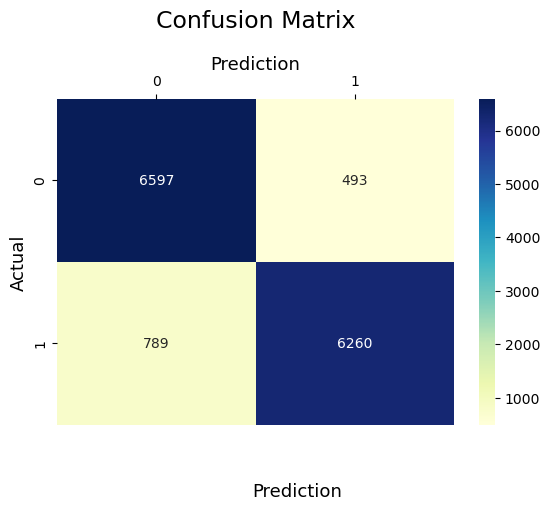

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7090
           1       0.93      0.89      0.91      7049

    accuracy                           0.91     14139
   macro avg       0.91      0.91      0.91     14139
weighted avg       0.91      0.91      0.91     14139



In [23]:
BLR_c = LogisticRegression(
                    penalty='l2',
                    solver='lbfgs',
                    random_state=42).fit(X_train_8, y_train_8)

y_pred_c = BLR_c.predict(X_test_8)

# accuracy
acc = accuracy_score(y_test_8, y_pred_c)
print(f"Binary Logistic Regression (13 features) accuracy: {acc}")

# Number correct = accuracy * total samples
num_total = len(y_test_8)
num_correct = int(acc * num_total)

print(f"Number Correct: {num_correct} out of {num_total}")

# Confusion Matrix
cm = confusion_matrix(y_test_8, y_pred_c)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            cmap = 'YlGnBu',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print(classification_report(y_test_8, y_pred_c))

#### **d)** 13 features, L1 reg, solver = 'liblinear' 

Binary Logistic Regression (13 features) accuracy: 0.9093288068463116
Number Correct: 12857 out of 14139


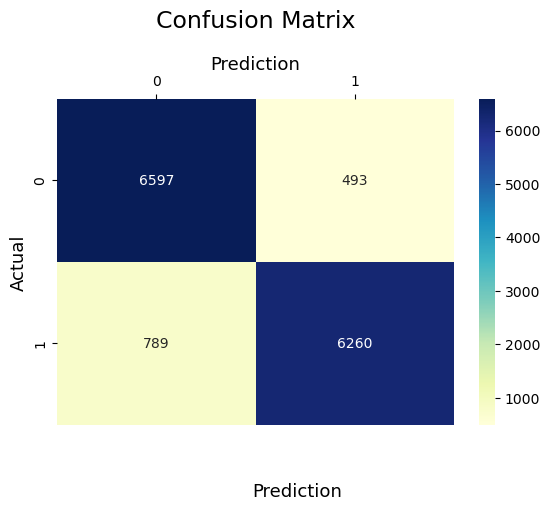

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7090
           1       0.93      0.89      0.91      7049

    accuracy                           0.91     14139
   macro avg       0.91      0.91      0.91     14139
weighted avg       0.91      0.91      0.91     14139



In [24]:
BLR_d = LogisticRegression(
                   penalty='l2',
                    solver='lbfgs',
                    random_state=42).fit(X_train_8, y_train_8)

y_pred_d = BLR_d.predict(X_test_8)

# accuracy
acc = accuracy_score(y_test_8, y_pred_c)
print(f"Binary Logistic Regression (13 features) accuracy: {acc}")

# Number correct = accuracy * total samples
num_total = len(y_test_8)
num_correct = int(acc * num_total)

print(f"Number Correct: {num_correct} out of {num_total}")

# Confusion Matrix
cm = confusion_matrix(y_test_8, y_pred_d)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            cmap = 'YlGnBu',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print(classification_report(y_test_8, y_pred_d))

### AIC and Final Statistics

In [25]:
# AIC
models = [BLR_a, BLR_b, BLR_c, BLR_d]
X_tests = [X_test_21, X_test_21, X_test_8, X_test_8]
y_tests = [y_test_21, y_test_21, y_test_8, y_test_8]

aic = []
accuracy = []

for i, model in enumerate(models):
    X_test = X_tests[i]
    y_test = y_tests[i]
    
    k = len(model.coef_.ravel()) + 1
    probs = model.predict_proba(X_test)[:, 1]
    probs = np.clip(probs, 1e-15, 1 - 1e-15)
    log_likelihood = np.sum(y_test * np.log(probs) + (1 - y_test) * np.log(1 - probs))
    AIC = 2 * k - 2 * log_likelihood
    
    acc = accuracy_score(y_test, model.predict(X_test))

    aic.append(AIC)
    accuracy.append(acc)
    
    print(f"Model {chr(ord('a') + i)}) Accuracy: {acc:.4f}, AIC: {AIC:.4f}")

lowest_aic = np.argmin(aic)
highest_accuracy = np.argmax(accuracy)

print("\n")
print("Lowest AIC Model:")
print(f"Model {chr(ord('a') + lowest_aic)}) AIC = {aic[lowest_aic]:.2f} and Accuracy = {accuracy[lowest_aic]:.4f}\n")
print("Highest Accuracy Model:")
print(f"Model {chr(ord('a') + highest_accuracy)}) AIC = {aic[highest_accuracy]:.2f} and Accuracy = {accuracy[highest_accuracy]:.4f}\n")

Model a) Accuracy: 0.9100, AIC: 5060.2417
Model b) Accuracy: 0.9099, AIC: 5057.3840
Model c) Accuracy: 0.9093, AIC: 5090.6223
Model d) Accuracy: 0.9093, AIC: 5090.6223


Lowest AIC Model:
Model b) AIC = 5057.38 and Accuracy = 0.9099

Highest Accuracy Model:
Model a) AIC = 5060.24 and Accuracy = 0.9100

